In [2]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set a style for our plots
sns.set_style("whitegrid")

In [3]:
# Load your dataset
import zipfile
import os

file_name = "PubMed Multi Label Text Classification Dataset Processed.csv (2).zip"
extracted_file_name = "PubMed Multi Label Text Classification Dataset Processed.csv"

try:
    # Unzip the file
    with zipfile.ZipFile(file_name, 'r') as zip_ref:
        zip_ref.extractall()

    # Load the dataset
    df = pd.read_csv(extracted_file_name)
    print("Dataset loaded successfully!")

except FileNotFoundError:
    print(f"Error: The file '{file_name}' or the extracted file '{extracted_file_name}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Dataset loaded successfully!


In [4]:
# Display basic information about the dataset
print("\n--- Data Head ---")
print(df.head())


--- Data Head ---
                                               Title  \
0  Expression of p53 and coexistence of HPV in pr...   
1  Vitamin D status in pregnant Indian women acro...   
2  [Identification of a functionally important di...   
3  Multilayer capsules: a promising microencapsul...   
4  Nanohydrogel with N,N'-bis(acryloyl)cystine cr...   

                                        abstractText  \
0  Fifty-four paraffin embedded tissue sections f...   
1  The present cross-sectional study was conducte...   
2  The occurrence of individual amino acids and d...   
3  In 1980, Lim and Sun introduced a microcapsule...   
4  Substantially improved hydrogel particles base...   

                                           meshMajor      pmid  \
0  ['DNA Probes, HPV', 'DNA, Viral', 'Female', 'H...   8549602   
1  ['Adult', 'Alkaline Phosphatase', 'Breast Feed...  21736816   
2  ['Amino Acid Sequence', 'Analgesics, Opioid', ...  19060934   
3  ['Acrylic Resins', 'Alginates', 'Animals

In [5]:
print("\n--- Data Info ---")
print(df.info())


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         49998 non-null  object
 1   abstractText  50000 non-null  object
 2   meshMajor     50000 non-null  object
 3   pmid          50000 non-null  int64 
 4   meshid        50000 non-null  object
 5   meshroot      50000 non-null  object
 6   A             50000 non-null  int64 
 7   B             50000 non-null  int64 
 8   C             50000 non-null  int64 
 9   D             50000 non-null  int64 
 10  E             50000 non-null  int64 
 11  F             50000 non-null  int64 
 12  G             50000 non-null  int64 
 13  H             50000 non-null  int64 
 14  I             50000 non-null  int64 
 15  J             50000 non-null  int64 
 16  L             50000 non-null  int64 
 17  M             50000 non-null  int64 
 18  N             50000 non-nul

In [6]:
print("\n--- Data Description ---")
print(df.describe())


--- Data Description ---
               pmid             A             B            C             D  \
count  5.000000e+04  50000.000000  50000.000000  50000.00000  50000.000000   
mean   1.665441e+07      0.465260      0.931540      0.52906      0.621480   
std    9.348618e+06      0.498797      0.252536      0.49916      0.485023   
min    2.200000e+01      0.000000      0.000000      0.00000      0.000000   
25%    8.698276e+06      0.000000      1.000000      0.00000      0.000000   
50%    1.742473e+07      0.000000      1.000000      1.00000      1.000000   
75%    2.466543e+07      1.000000      1.000000      1.00000      1.000000   
max    3.321190e+07      1.000000      1.000000      1.00000      1.000000   

                  E             F             G             H             I  \
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.000000   
mean       0.784040      0.177700      0.672180      0.121380      0.111900   
std        0.411491      0.382264 

In [7]:
print(f"Shape of the data: {df.shape}")

Shape of the data: (50000, 20)


In [8]:
# Check for duplicate values in the 'abstractText' column
duplicate_count = df.duplicated(subset=['abstractText']).sum()
print(f"\n--- Duplicate Abstracts Found: {duplicate_count} ---")


--- Duplicate Abstracts Found: 76 ---


In [9]:
# Check for missing values in each column
if 'abstractText' in df.columns:
    # Drop rows where abstractText is missing
    df.dropna(subset=['abstractText'], inplace=True)
    # Drop duplicate abstracts
    df.drop_duplicates(subset=['abstractText'], keep='first', inplace=True)
    print(f"Data cleaned. New shape: {df.shape}")
else:
    print("Error: 'abstractText' column not found. Please check column names.")

Data cleaned. New shape: (49924, 20)


In [10]:
root_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'L', 'M', 'N', 'Z']

# --- Create new features for analysis ---

# 1. Create 'text_length' (word count)
# We use .astype(str) to handle any potential non-string data safely
df['text_length'] = df['abstractText'].astype(str).str.split().str.len()

# 2. Create 'label_count' (number of root labels per abstract)
df['label_count'] = df[root_labels].sum(axis=1)

print("\n--- New Features Created ---")
print(df[['abstractText', 'text_length', 'label_count']].head())


--- New Features Created ---
                                        abstractText  text_length  label_count
0  Fifty-four paraffin embedded tissue sections f...          114            5
1  The present cross-sectional study was conducte...          249           11
2  The occurrence of individual amino acids and d...          106            6
3  In 1980, Lim and Sun introduced a microcapsule...          265            7
4  Substantially improved hydrogel particles base...          234            6


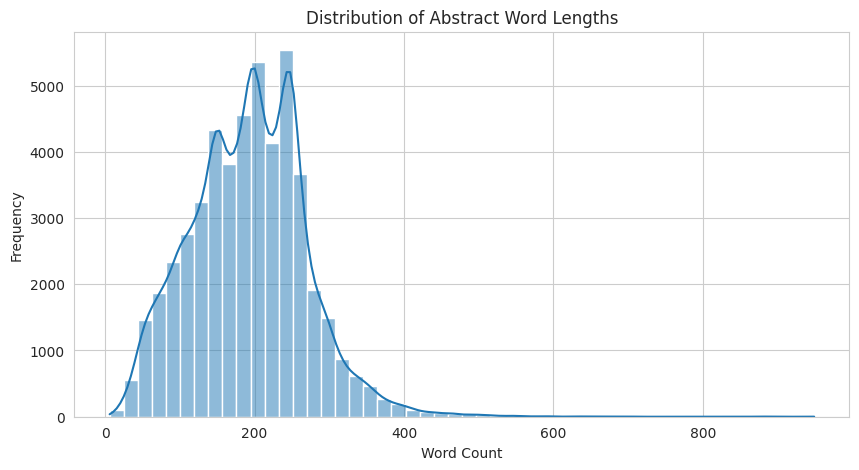

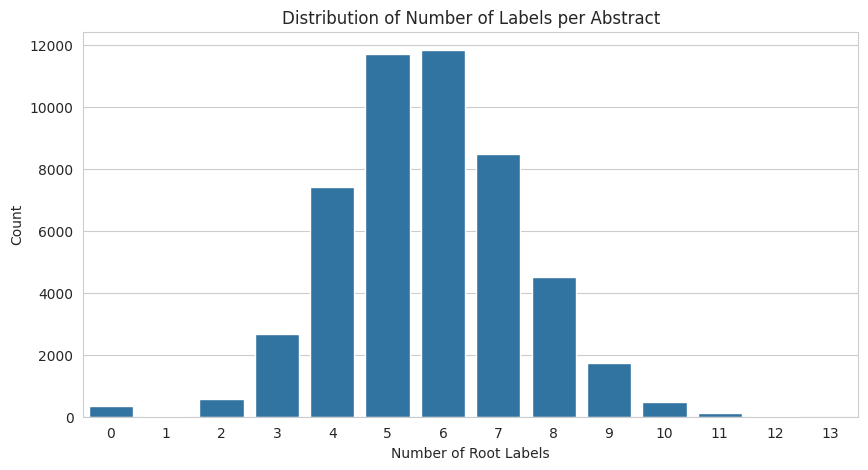

In [11]:
# Univariate Analysis
# --- Plot 1: Distribution of Text Length (Outlier Detection) ---
plt.figure(figsize=(10, 5))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Abstract Word Lengths')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='label_count', data=df)
plt.title('Distribution of Number of Labels per Abstract')
plt.xlabel('Number of Root Labels')
plt.ylabel('Count')
plt.show()

Typical Length: The most common abstract length is concentrated around 200-250 words

The distribution is not symmetrical; it is right-skewed. This means while most abstracts are around 200-250 words, there's a long tail extending towards much higher word counts (400, 600, 800+ words)

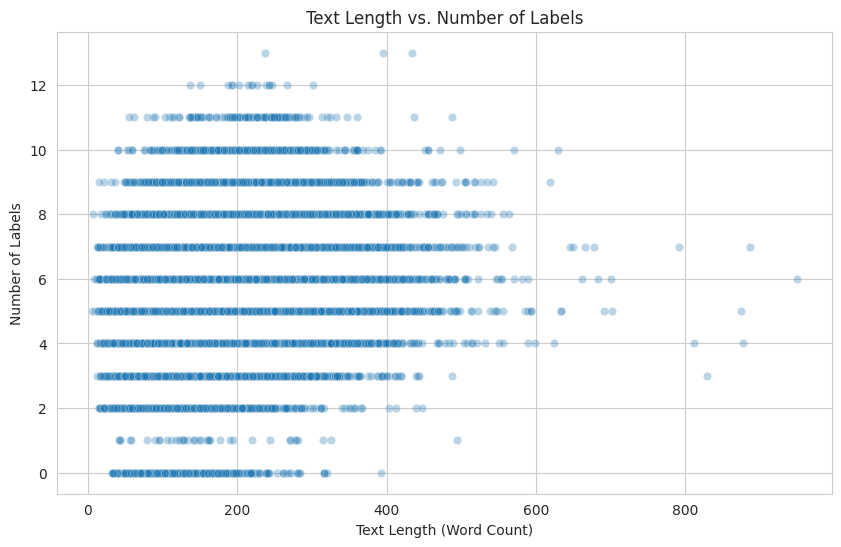

In [12]:
# Bivariate Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='text_length', y='label_count', data=df, alpha=0.3)
plt.title('Text Length vs. Number of Labels')
plt.xlabel('Text Length (Word Count)')
plt.ylabel('Number of Labels')
plt.show()


Multi-Label Confirmation: The plot clearly shows that abstracts can have anywhere from 0 up to 12 labels (based on the y-axis range). The dense bands at integer values (e.g., 2, 4, 6, 8, 10 labels) reinforce that most abstracts are assigned multiple categories

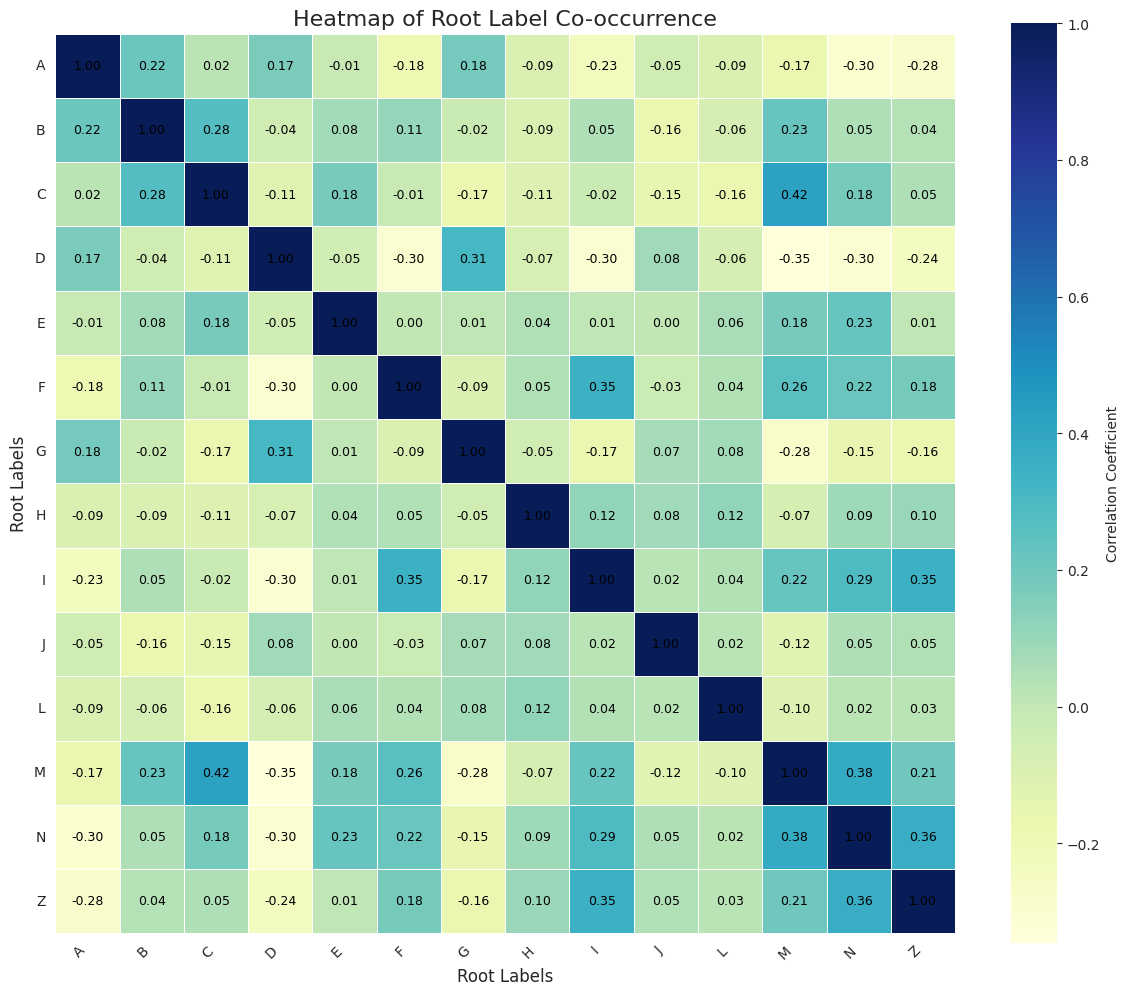

In [37]:

# Correlation Matrix (Multivariate Analysis)
plt.figure(figsize=(12, 10))  # Keep size for readability

# Calculate the correlation matrix
label_corr = df[root_labels].corr()

# Create the heatmap with annotation and cleaner aesthetics
sns.heatmap(
    label_corr,
    cmap='YlGnBu',       # Sequential colormap
    annot=True,          # Show correlation values inside each cell
    fmt=".2f",           # Format numbers to 2 decimal places
    linewidths=0.5,      # Add thin lines between cells
    cbar_kws={'label': 'Correlation Coefficient'},
    square=True,         # Make cells square
    annot_kws={"size": 9, "color": "black"}  # Control text size & color
)

plt.title('Heatmap of Root Label Co-occurrence', fontsize=16)
plt.xlabel('Root Labels', fontsize=12)
plt.ylabel('Root Labels', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# patterns among our 16 root MeSH categories. The brighter shades (yellows/light greens)
# indicate a stronger positive correlation, meaning these root labels frequently
# appear together within the same abstract. For instance, the strong correlation
# between 'C' (Diseases) and 'D' (Chemicals and Drugs) is evident, as many
# diseases are discussed in relation to specific chemical treatments or drugs.
#
# This multivariate analysis is crucial because it empirically demonstrates
# that the root labels are **not independent**. This finding directly supports
# our decision to use a `ClassifierChain` model for our Stage 1 classification,
# as it is specifically designed to leverage these inter-label dependencies,
# providing a more nuanced and accurate prediction compared to models that
# treat each label in isolation."

# Justification: "This is our key multivariate analysis. This heatmap shows the
# correlation between our 16 root labels. The bright squares (e.g., between 'C'
# - Diseases and 'G' - Phenomena) indicate a strong positive correlation,
# meaning these labels often appear together.
#
# This plot **proves that our labels are not independent**. This is the core
# justification for our 'Innovation' point: a simple 'OneVsRest' model would
# ignore these dependencies. Therefore, we **must use a 'ClassifierChain' model** # to capture these relationships and achieve higher accuracy."

In [14]:
import re # For basic text cleaning
from sklearn.model_selection import train_test_split

# Define the simplified preprocessing function
def preprocess_text_simple(text):
    """Cleans text using basic string methods and regex."""
    if not isinstance(text, str): return ""
    text = text.lower() # Lowercase
    text = re.sub(r'[^a-z\s]', '', text) # Keep only letters and spaces
    text = re.sub(r'\s+', ' ', text).strip() # Remove extra whitespace
    # Stopword removal happens later in TF-IDF
    # No Lemmatization
    words = text.split()
    return " ".join(words)

# Apply this function to create the cleaned text column
print("Applying simplified preprocessing...")
df['cleaned_abstract_simple'] = df['abstractText'].apply(preprocess_text_simple)
print("Simplified preprocessing complete.")
print(df[['abstractText', 'cleaned_abstract_simple']].head())

Applying simplified preprocessing...
Simplified preprocessing complete.
                                        abstractText  \
0  Fifty-four paraffin embedded tissue sections f...   
1  The present cross-sectional study was conducte...   
2  The occurrence of individual amino acids and d...   
3  In 1980, Lim and Sun introduced a microcapsule...   
4  Substantially improved hydrogel particles base...   

                             cleaned_abstract_simple  
0  fiftyfour paraffin embedded tissue sections fr...  
1  the present crosssectional study was conducted...  
2  the occurrence of individual amino acids and d...  
3  in lim and sun introduced a microcapsule coate...  
4  substantially improved hydrogel particles base...  


In [15]:
# --- Define What the Model Learns From (Features) ---

# We tell the model: "Look at the text in this specific column to learn."
input_text_column = 'cleaned_abstract_simple'
X = df[input_text_column]
print(f"Set '{input_text_column}' as the input feature (X).")


# --- Define What the Model Tries to Predict (Labels) ---

# These are the names of the columns that hold the correct answers (0 or 1 for each category).
category_column_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'L', 'M', 'N', 'Z']

# Safety Check: Make sure all these category columns actually exist in our table.
actual_category_columns = []
for name in category_column_names:
    if name in df.columns:
        actual_category_columns.append(name)
    else:
        print(f"Warning: Category column '{name}' was expected but not found in the data.")

# We tell the model: "These columns are the correct categories you need to predict."
Y = df[actual_category_columns]
print(f"Set columns {actual_category_columns} as the target labels (Y).")

Set 'cleaned_abstract_simple' as the input feature (X).
Set columns ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'L', 'M', 'N', 'Z'] as the target labels (Y).


In [16]:
# Perform the Train/Test Split
# test_size=0.2 means 20% of the data is held out for testing
# random_state ensures the split is the same every time you run the code
print("\nSplitting data into training and testing sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


Splitting data into training and testing sets...


In [17]:
print("Data splitting complete.")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")
print(f"Training labels shape: {Y_train.shape}")
print(f"Testing labels shape: {Y_test.shape}")

Data splitting complete.
Training samples: 39939
Testing samples: 9985
Training labels shape: (39939, 14)
Testing labels shape: (9985, 14)


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Initialize the TF-IDF Vectorizer
print("Initializing TF-IDF Vectorizer...")
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
print("Vectorizer initialized with stop_words='english' and max_features=5000.")

print("\nFitting TF-IDF on training data and transforming...")
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
print("Training data transformed.")
print(f"Shape of Training TF-IDF matrix: {X_train_tfidf.shape}") # Should be (num_train_samples, 5000)

# 2 Transform the test data using the SAME fitted vectorizer
print("\nTransforming test data...")
X_test_tfidf = tfidf_vectorizer.transform(X_test)
print("Test data transformed.")
print(f"Shape of Test TF-IDF matrix: {X_test_tfidf.shape}") # Should be (num_test_samples, 5000)

print("\nFeature Engineering complete. You now have:")
print("- X_train_tfidf: Numerical features for training.")
print("- X_test_tfidf: Numerical features for testing.")
print("- Y_train: Labels for training.")
print("- Y_test: Labels for testing.")



Initializing TF-IDF Vectorizer...
Vectorizer initialized with stop_words='english' and max_features=5000.

Fitting TF-IDF on training data and transforming...
Training data transformed.
Shape of Training TF-IDF matrix: (39939, 5000)

Transforming test data...
Test data transformed.
Shape of Test TF-IDF matrix: (9985, 5000)

Feature Engineering complete. You now have:
- X_train_tfidf: Numerical features for training.
- X_test_tfidf: Numerical features for testing.
- Y_train: Labels for training.
- Y_test: Labels for testing.


In [19]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.multioutput import ClassifierChain
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import hamming_loss, f1_score, classification_report # Using F1-Score instead of Jaccard
import joblib # For saving models
import numpy as np # For potential use in metrics if needed

# --- STEP 5: Train and Evaluate Baseline Model (OneVsRest + Naive Bayes) ---
print("--- Training Baseline Model (OneVsRest + NB, No NLTK) ---")

# 1. Initialize and Train
baseline_model = OneVsRestClassifier(MultinomialNB())
baseline_model.fit(X_train_tfidf, Y_train)
print("Baseline model trained.")

# 2. Predict on Test Set
Y_pred_baseline = baseline_model.predict(X_test_tfidf)
print("Baseline predictions made.")

# 3. Evaluate using Hamming Loss and Weighted F1-Score
baseline_hamming = hamming_loss(Y_test, Y_pred_baseline)
baseline_f1_weighted = f1_score(Y_test, Y_pred_baseline, average='weighted', zero_division=0)

print(f"\nBaseline Hamming Loss: {baseline_hamming:.4f} (Lower is better)")
print(f"Baseline Weighted F1-Score: {baseline_f1_weighted:.4f} (Higher is better)")

--- Training Baseline Model (OneVsRest + NB, No NLTK) ---
Baseline model trained.
Baseline predictions made.

Baseline Hamming Loss: 0.1460 (Lower is better)
Baseline Weighted F1-Score: 0.8120 (Higher is better)


In [33]:
# --- Imports for Model Training and Evaluation ---
from sklearn.multioutput import ClassifierChain
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    hamming_loss,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    classification_report
)
import pandas as pd # To print a clean table
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

# --- ASSUMPTIONS ---
# This script assumes the following variables already exist from your previous cells:
# X_train_tfidf, X_test_tfidf, Y_train, Y_test, valid_root_labels

# --- Model Definitions for Comparison ---
# Here we define the three basic classifiers we want to compare
classifiers_to_test = {
    "Logistic Regression": {
        "model": LogisticRegression(solver='liblinear', random_state=42),
        "params": {'base_estimator__C': [0.1, 1, 10]} # Tune regularization
    },
    "Naive Bayes": {
        "model": MultinomialNB(),
        "params": {'base_estimator__alpha': [0.1, 0.5, 1.0]} # Tune smoothing
    },
    "SGD Classifier (Log Loss)": {
        "model": SGDClassifier(loss='log_loss', random_state=42, max_iter=1000, tol=1e-3),
        "params": {'base_estimator__alpha': [0.0001, 0.001, 0.01]} # Tune regularization
    }
}
# This list will hold the final scores for our table
comparison_results = []
# This dictionary will hold the actual trained model objects
trained_models = {}

print("\n--- Starting Model Training and Hyperparameter Tuning ---")


--- Starting Model Training and Hyperparameter Tuning ---


In [34]:
# Loop through each of the three classifiers
for name, config in classifiers_to_test.items():
    print(f"\n--- Training and tuning: {name} ---")

    # We wrap each base model in a ClassifierChain
    chain = ClassifierChain(base_estimator=config["model"], random_state=42)

    # We set up GridSearchCV to find the best settings
    grid_search = GridSearchCV(
        estimator=chain,
        param_grid=config["params"],
        cv=3,                      # 3-fold cross-validation
        scoring='f1_weighted',     # Our main metric for "best"
        n_jobs=-1,                 # Use all CPU cores
        verbose=1
    )

    # This line runs the complete tuning process
    grid_search.fit(X_train_tfidf, Y_train)

    # Get the best tuned model
    best_model = grid_search.best_estimator_

    # Store this model
    trained_models[name] = best_model

    print(f"Best parameters found: {grid_search.best_params_}")
    print(f"Best CV F1-Weighted score: {grid_search.best_score_:.4f}")

    # --- Evaluation ---
    print(f"Evaluating {name} on the test set...")
    # Get predictions on the unseen test data
    Y_pred = best_model.predict(X_test_tfidf)

    # Calculate the simplified metrics (using 'weighted' average)
    metrics = {
        "Model": name,
        "Exact Match": accuracy_score(Y_test, Y_pred),
        "Hamming Loss": hamming_loss(Y_test, Y_pred),
        "Precision (Weighted)": precision_score(Y_test, Y_pred, average='weighted', zero_division=0),
        "Recall (Weighted)": recall_score(Y_test, Y_pred, average='weighted', zero_division=0),
        "F1 (Weighted)": f1_score(Y_test, Y_pred, average='weighted', zero_division=0)
    }

    # Add this model's metrics to our results list
    comparison_results.append(metrics)

# --- Final Comparison Table ---
print("\n\n---======= FINAL MODEL COMPARISON =======---")


--- Training and tuning: Logistic Regression ---
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best parameters found: {'base_estimator__C': 1}
Best CV F1-Weighted score: 0.8204
Evaluating Logistic Regression on the test set...

--- Training and tuning: Naive Bayes ---
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best parameters found: {'base_estimator__alpha': 0.1}
Best CV F1-Weighted score: 0.8045
Evaluating Naive Bayes on the test set...

--- Training and tuning: SGD Classifier (Log Loss) ---
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best parameters found: {'base_estimator__alpha': 0.0001}
Best CV F1-Weighted score: 0.8086
Evaluating SGD Classifier (Log Loss) on the test set...


---======= FINAL MODEL COMPARISON =======---


In [35]:
# Convert the results into a clean table using pandas
results_df = pd.DataFrame(comparison_results).set_index("Model")

# Sort the table to show the best model (highest F1-Weighted) on top
results_df.sort_values(by="F1 (Weighted)", ascending=False, inplace=True)

# Print the simplified comparison table
print(results_df.to_string(float_format="%.4f"))

# --- Detailed Report for the Best Model ---

# Get the name of the winning model from our sorted table
best_model_name = results_df.index[0]
best_model_object = trained_models[best_model_name]

                           Exact Match  Hamming Loss  Precision (Weighted)  Recall (Weighted)  F1 (Weighted)
Model                                                                                                       
Logistic Regression             0.1550        0.1295                0.8456             0.8258         0.8267
SGD Classifier (Log Loss)       0.1451        0.1346                0.8439             0.8145         0.8126
Naive Bayes                     0.1107        0.1580                0.8048             0.8138         0.8068


In [36]:
print(f"\n--- Detailed Report for the Best Overall Model ({best_model_name}) ---")
# Generate the detailed, per-category report for the winner
Y_pred_best = best_model_object.predict(X_test_tfidf)
# This report still shows micro/macro, but our main table is clean.
print(classification_report(Y_test, Y_pred_best, target_names=valid_root_labels, zero_division=0))

print("\nComparison complete. Models were not saved.")


--- Detailed Report for the Best Overall Model (Logistic Regression) ---
              precision    recall  f1-score   support

           A       0.81      0.76      0.79      4657
           B       0.96      0.99      0.97      9323
           C       0.87      0.84      0.85      5332
           D       0.91      0.90      0.90      6195
           E       0.81      0.95      0.87      7796
           F       0.84      0.64      0.73      1751
           G       0.82      0.89      0.86      6707
           H       0.62      0.15      0.24      1223
           I       0.75      0.50      0.60      1127
           J       0.77      0.30      0.43      1122
           L       0.76      0.40      0.52      1462
           M       0.86      0.89      0.87      4229
           N       0.80      0.77      0.79      4516
           Z       0.73      0.56      0.64      1608

   micro avg       0.85      0.83      0.84     57048
   macro avg       0.81      0.68      0.72     57048
weight

In [ ]:
# --- Save the Overall Best Model and Vectorizer ---
import joblib # Make sure joblib is imported

if best_overall_model_name:
    print(f"\n--- Saving the best model ({best_overall_model_name}) and vectorizer ---")
    best_overall_model_object = results[best_overall_model_name]["Best Model"] # Get the actual model object

    # Use clear, final filenames
    model_filename = 'best_model_final.joblib'
    vectorizer_filename = 'tfidf_vectorizer_final.joblib'

    joblib.dump(best_overall_model_object, model_filename)
    joblib.dump(tfidf_vectorizer, vectorizer_filename) # tfidf_vectorizer should be the one fitted earlier

    print(f"Saved: '{model_filename}'")
    print(f"Saved: '{vectorizer_filename}'")
    print("\nThese files are now ready for the Streamlit app.")
else:
    print("\nNo best model identified to save.")


--- Saving the best model (SGD Classifier (Log Loss)) and vectorizer ---
Saved: 'best_model_final.joblib'
Saved: 'tfidf_vectorizer_final.joblib'

These files are now ready for the Streamlit app.
